In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../course_notebooks/DATA/penguins_size.csv')
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
x = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)


In [8]:
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier().get_params())
help(RandomForestClassifier)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree


In [9]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)


In [10]:
rfc.fit(x_train,y_train)
preds = rfc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


In [24]:
fi = pd.DataFrame(rfc.feature_importances_)
fi['feature'] = pd.Series(x.columns)
fi.columns = ['importance', 'feature']
fi

,importance,feature
0,0.318677,culmen_length_mm
1,0.101849,culmen_depth_mm
2,0.173434,flipper_length_mm
3,0.213170,body_mass_g
4,0.145121,island_Dream
5,0.037201,island_Torgersen
6,0.006323,sex_FEMALE
7,0.004226,sex_MALE


In [29]:
df = pd.read_csv('../course_notebooks/DATA/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


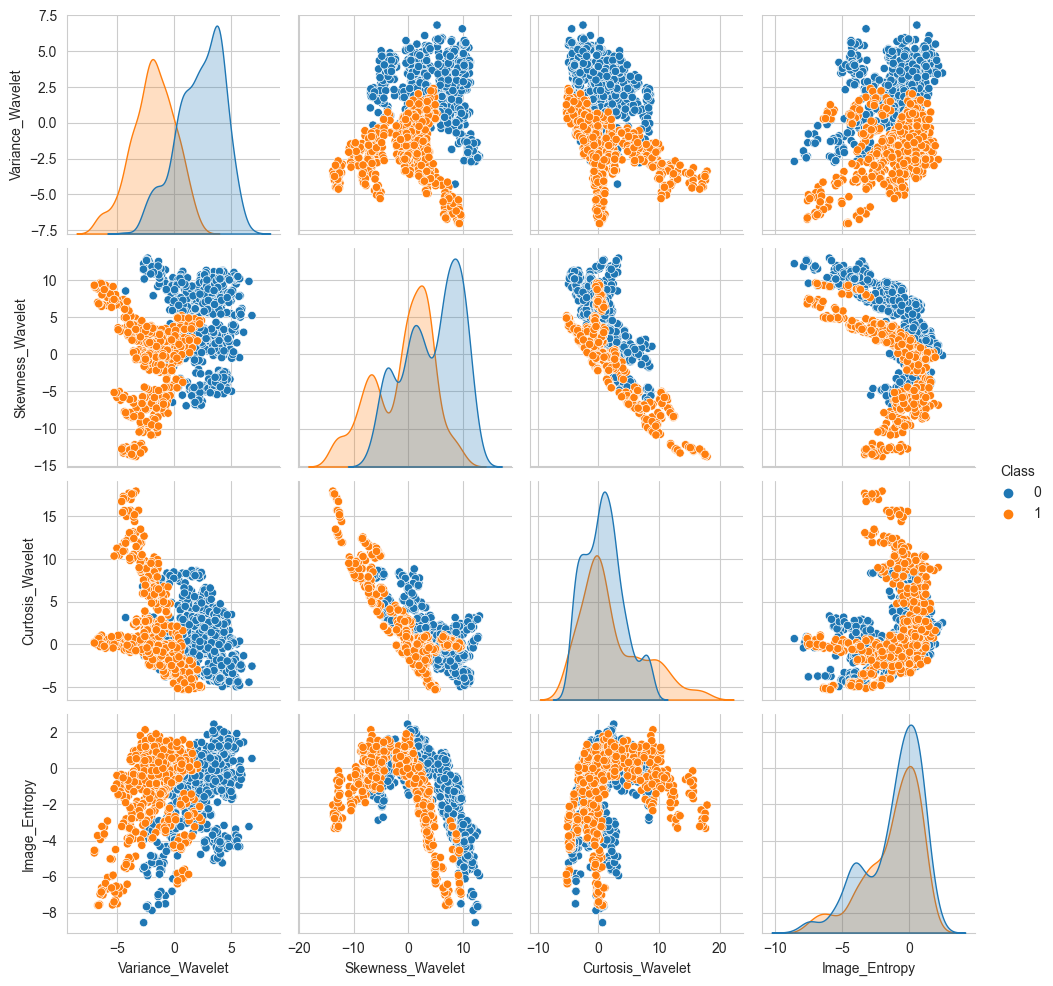

In [30]:
sns.pairplot(df,hue='Class')

In [31]:
# {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
x = df.drop('Class',axis=1)
y = df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=101)
rfc_model = RandomForestClassifier()

n_estimators = [64,100,128,200]
max_features = [2,3,4] # max_features = ['auto','sqrt','log2',0.5,3]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}
grid_model = GridSearchCV(rfc_model, param_grid)
grid_model.fit(x_train,y_train)

F:\Dev\python\course\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Dev\python\course\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Dev\python\course\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
F

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [32]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [33]:
best_rfc = RandomForestClassifier(n_estimators=100,max_features=2,bootstrap=True,oob_score=True)
best_rfc.fit(x_train,y_train)
best_rfc.oob_score_

0.9948542024013722

In [34]:
predictions = best_rfc.predict(x_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



F:\Dev\python\course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


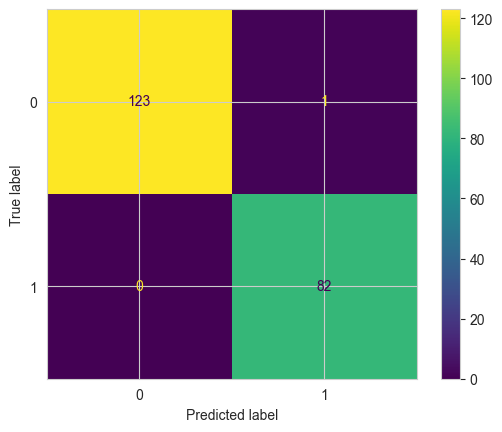

In [35]:
plot_confusion_matrix(best_rfc,x_test,y_test)

In [42]:
print('True values')
print(y_test[:5])
print('\nPredictions')
print(predictions[:5])
y_test != predictions

True values
194     0
622     0
1063    1
390     0
327     0
Name: Class, dtype: int64

Predictions
[0 0 1 0 0]


194     False
622     False
1063    False
390     False
327     False
        ...  
897     False
354     False
1057    False
869     False
352     False
Name: Class, Length: 206, dtype: bool

In [43]:
from sklearn.metrics import accuracy_score
errors = []
missclassifications = []
for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(x_train,y_train)
    preds = rfc.predict(x_test)
    error = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)

    errors.append(error)
    missclassifications.append(missclassifications)

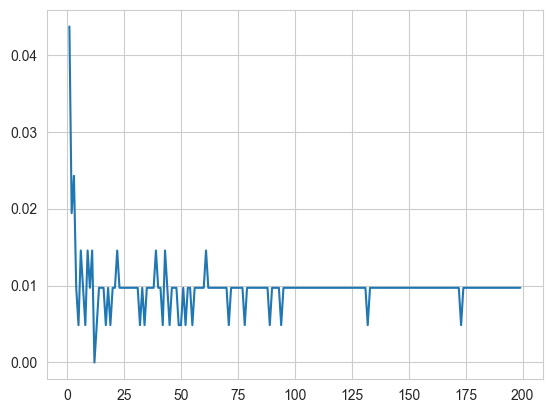

In [44]:
plt.plot(range(1,200),errors)
